# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tqdm as tqdm

In [2]:
dt = 1/252
dW = np.random.randn()*dt
# Mean that dW is 1 day increment with unit annual vol

In [3]:
cmf_rateslib_root = '../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

# Curves

In [4]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve

In [5]:
curve = BaseZeroCurve([0,2,5,10], [0.01, 0.02, 0.03, 0.03])

In [6]:
curve.df(0.15)

0.9983887993796147

In [7]:
curve.zero_rate(4.5)

0.028333333333333332

In [8]:
curve.fwd_rate(1, 1.5)

-0.026111111111111127

In [9]:
curve.bump?

In [10]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


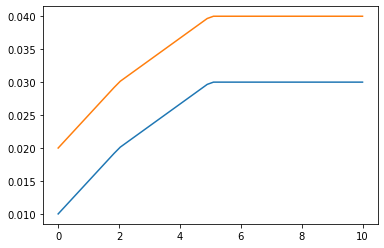

In [11]:
t = np.linspace(0, 10)
plot(t, curve.zero_rate(t), t, curve.bump(0.01).zero_rate(t))

In [12]:
spread_curve = BaseZeroCurve([0, 5, 10], [0.001, 0.002, 0.003])

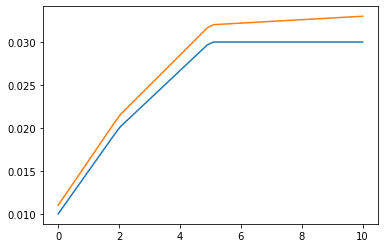

In [13]:
t = np.linspace(0, 10)
new_curve = curve + spread_curve
plot(t, curve.zero_rate(t), t, new_curve.zero_rate(t))

# Products

In [14]:
from cmf_rateslib.products.base_product import BaseProduct

In [15]:
p = BaseProduct()

In [16]:
p.get_cashflows()

In [17]:
p.pv()

0

In [18]:
from cmf_rateslib.products.bonds import ZCBond

In [19]:
bond = ZCBond(expiry=9)

In [20]:
bond.get_cashflows()

(array([9]), array([1]))

In [21]:
bond.pv(0, curve + spread_curve)

0.7443826960380553

# Rates Models

 Simple PCA curve Generator
 
 $n$ zero rates and $m$ factors
 $$
     dZ = U dX
 $$
 
 $$
 dX_i = \sigma_i dW_i 
 $$
 
 Mean Reverting PCA curve Generator
 
 Same as abobe, but:
 $$
 dX_i = (\theta_i - X)dt + \sigma_i dW_i 
 $$

In [22]:
from cmf_rateslib.rates.simple_pca import SimplePCAModel

In [23]:
model = SimplePCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001])

In [24]:
curves = model.evolve_zero_curve(curve, 5, 1/252)

In [25]:
model.evolve_zero_curve?

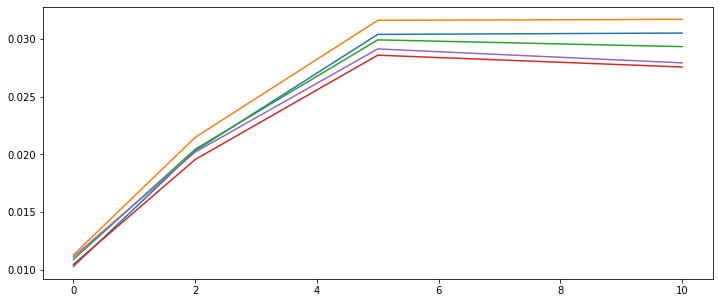

In [26]:
fig = plt.figure(figsize=(12, 5))

for cur in curves:
    plt.plot(cur._maturities, cur._rates)

In [27]:
model.create_new?

In [28]:
gen_curves = model.create_new(15, 1/252)

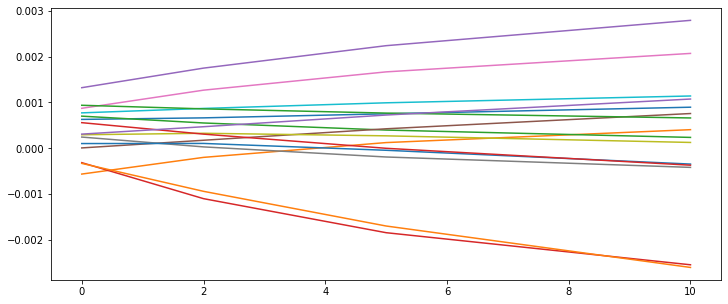

In [29]:
fig = plt.figure(figsize=(12, 5))

for cur in gen_curves:
    plt.plot(cur._maturities, cur._rates)

In [30]:
model.fit(curves)[0].real, model.fit(curves)[1].real, model.fit(curves)[2]

(array([ 4.07443057e-04,  3.16455642e-07,  3.57414115e-10, -3.87167919e-21,
         8.40159967e-21]),
 array([[-0.47769632, -0.49585772,  0.53970416, -0.48224747,  0.28319961],
        [-0.48231384, -0.46095002, -0.59491679,  0.31605068,  0.11456635],
        [-0.44311665,  0.08173395, -0.05293038,  0.21367738, -0.85450265],
        [-0.41662094,  0.43356415,  0.47595883,  0.53337914,  0.03837682],
        [-0.41140518,  0.58906017, -0.35419626, -0.58085973,  0.41835987]]),
 array([[1, 0, 2],
        [1, 1, 1],
        [1, 2, 1],
        [1, 3, 2]]))

In [31]:
from cmf_rateslib.rates.mean_reverting_pca import MeanRevertingPCAModel

In [32]:
MeanRevertingPCAModel?

In [33]:
model = MeanRevertingPCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001], theta = 0.02)

In [34]:
mr_curves = model.evolve_zero_curve(curve, 10, 1/252)

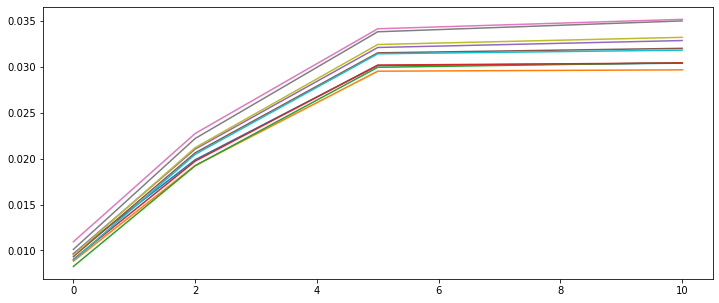

In [35]:
fig = plt.figure(figsize=(12, 5))

for cur in mr_curves:
    plt.plot(cur._maturities, cur._rates)

In [36]:
mr_gen_curves = model.create_new(10, dt)

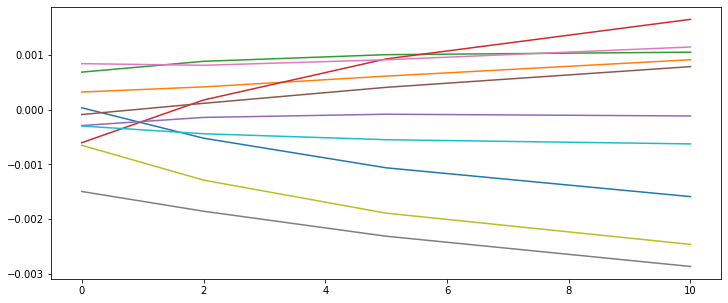

In [37]:
fig = plt.figure(figsize=(12, 5))

for cur in mr_gen_curves:
    plt.plot(cur._maturities, cur._rates)

In [38]:
model = MeanRevertingPCAModel(
    maturities=[2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1],
        [1,2,3],
        [1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001], theta = [0.02])

In [39]:
new_curves = model.create_new_1(dt)

In [40]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


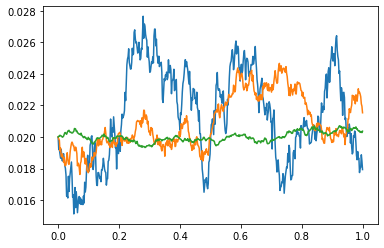

In [41]:
t = np.linspace(0, 1, 2 * 253)
plot(t, new_curves[0])
plot(t, new_curves[1])
plot(t, new_curves[2])
pylab.show()

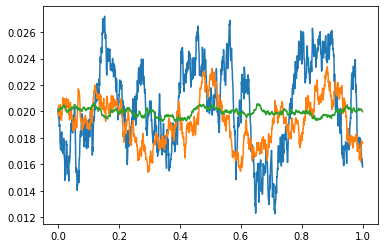

In [42]:
t = np.linspace(0, 1, 5 * 253)
plot(t, new_curves[3])
plot(t, new_curves[4])
plot(t, new_curves[5])
pylab.show()

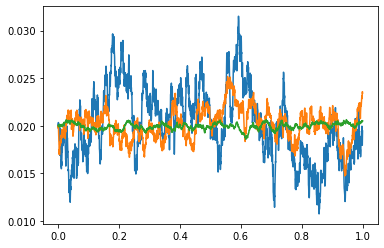

In [43]:
t = np.linspace(0, 1, 10 * 253)
plot(t, new_curves[6])
plot(t, new_curves[7])
plot(t, new_curves[8])
pylab.show()